In [34]:
import functools
import subprocess
import pandas as pd
import sys
import yfinance as yf
import concurrent.futures
import logging
from threading import Thread
from threading import RLock
import os 
import json
import path_signature
import matplotlib.pyplot as plt
import numpy as np


In [14]:
tickers = pd.read_csv(r"C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Basket Trade\tickers.csv", header=None)
tickers = tickers.values
print(tickers)
ts = yf.Ticker(tickers[0][0])
hist = ts.history(interval='1d', period='5y')
hist

[['AAAU']
 ['AAXJ']
 ['ACWI']
 ...
 ['ZXM']
 ['ZXM.B']
 ['ZZZD']]


Open       High        Low      Close  \
Date                                                                    
2019-07-01 00:00:00-04:00  13.800000  13.960000  13.750000  13.810000   
2019-07-02 00:00:00-04:00  13.900000  14.120000  13.890000  14.120000   
2019-07-03 00:00:00-04:00  14.140000  14.190000  14.120000  14.140000   
2019-07-05 00:00:00-04:00  13.890000  14.010000  13.840000  13.980000   
2019-07-08 00:00:00-04:00  14.000000  14.010000  13.900000  13.900000   
...                              ...        ...        ...        ...   
2024-06-24 00:00:00-04:00  23.059999  23.100000  23.020000  23.080000   
2024-06-25 00:00:00-04:00  23.000000  23.030001  22.910000  22.950001   
2024-06-26 00:00:00-04:00  22.730000  22.799999  22.700001  22.750000   
2024-06-27 00:00:00-04:00  22.959999  23.049999  22.950001  23.000000   
2024-06-28 00:00:00-04:00  23.070000  23.080000  22.980000  23.010000   

                            Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                        
2019-07-01 00:00:00-04:00    26300        0.0           0.0            0.0  
2019-07-02 00:00:00-04:00    20200        0.0           0.0            0.0  
2019-07-03 00:00:00-04:00    31600        0.0           0.0            0.0  
2019-07-05 00:00:00-04:00    39500        0.0           0.0            0.0  
2019-07-08 00:00:00-04:00    39300        0.0           0.0            0.0  
...                            ...        ...           ...            ...  
2024-06-24 00:00:00-04:00  1717100        0.0           0.0            0.0  
2024-06-25 00:00:00-04:00  1266900        0.0           0.0            0.0  
2024-06-26 00:00:00-04:00  1470600        0.0           0.0            0.0  
2024-06-27 00:00:00-04:00  1463100        0.0           0.0            0.0  
2024-06-28 00:00:00-04:00  1080900        0.0           0.0            0.0  

[1258 rows x 8 columns]

In [15]:
lock = RLock()

yf.set_tz_cache_location(r"C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Basket Trade")

format = "%(asctime)s: %(message)s"
logging.basicConfig(format=format, level=logging.INFO,
                    datefmt="%H:%M:%S")
#need to make sure items are unique as race conditions are not handled  for multithreading
# keys: ticker name
# values: (info, history)
LE_HISTO = dict() 
def loadHistory(ticker: list, histo: dict, lock:RLock):
    with lock:
        ts = yf.Ticker(ticker[0])
        # get all stock info
        #info = ts.info
        # get historical market data
        hist = ts.history(interval="1d", period='5y')
        histo[ticker[0]] = hist ## to replace with struct
func = lambda x: loadHistory(x, LE_HISTO, lock)
with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
    #result = executor.map(functools.partial(loadHistory , tickers, LE_HISTO, lock))
    result = executor.map(func, tickers)

20:12:09: AGLB: No data found, symbol may be delisted
20:12:11: AHYG: No data found, symbol may be delisted
20:12:11: AVFM: No price data found, symbol may be delisted (period=5y)
20:12:12: ATSX: No price data found, symbol may be delisted (period=5y)
20:12:14: AZGIW: No data found, symbol may be delisted
20:12:16: BAS500: No data found, symbol may be delisted
20:12:17: BBCD: No data found, symbol may be delisted
20:12:19: BDEQ: No data found, symbol may be delisted
20:12:21: BGEQ: No data found, symbol may be delisted
20:12:23: BDIV: No data found, symbol may be delisted
20:12:24: BGIF: No data found, symbol may be delisted
20:12:26: BGIN: No data found, symbol may be delisted
20:12:28: BESG: No data found, symbol may be delisted
20:12:28: BGHC: No price data found, symbol may be delisted (period=5y)
20:12:29: BEPR: No data found, symbol may be delisted
20:12:31: BEPR.U: No data found, symbol may be delisted
20:12:33: BGRT: No data found, symbol may be delisted
20:12:33: BGZ: No price

In [16]:
LE_HISTO

{'AAAU':                                 Open       High        Low      Close  \
 Date                                                                    
 2019-07-01 00:00:00-04:00  13.800000  13.960000  13.750000  13.810000   
 2019-07-02 00:00:00-04:00  13.900000  14.120000  13.890000  14.120000   
 2019-07-03 00:00:00-04:00  14.140000  14.190000  14.120000  14.140000   
 2019-07-05 00:00:00-04:00  13.890000  14.010000  13.840000  13.980000   
 2019-07-08 00:00:00-04:00  14.000000  14.010000  13.900000  13.900000   
 ...                              ...        ...        ...        ...   
 2024-06-24 00:00:00-04:00  23.059999  23.100000  23.020000  23.080000   
 2024-06-25 00:00:00-04:00  23.000000  23.030001  22.910000  22.950001   
 2024-06-26 00:00:00-04:00  22.730000  22.799999  22.700001  22.750000   
 2024-06-27 00:00:00-04:00  22.959999  23.049999  22.950001  23.000000   
 2024-06-28 00:00:00-04:00  23.070000  23.080000  22.980000  23.010000   
 
                            

In [17]:
filtered_Histo = dict()
for sym in LE_HISTO:
    if len(LE_HISTO[sym]) != 0:
        filtered_Histo[sym]= LE_HISTO[sym]
filtered_Histo

{'AAAU':                                 Open       High        Low      Close  \
 Date                                                                    
 2019-07-01 00:00:00-04:00  13.800000  13.960000  13.750000  13.810000   
 2019-07-02 00:00:00-04:00  13.900000  14.120000  13.890000  14.120000   
 2019-07-03 00:00:00-04:00  14.140000  14.190000  14.120000  14.140000   
 2019-07-05 00:00:00-04:00  13.890000  14.010000  13.840000  13.980000   
 2019-07-08 00:00:00-04:00  14.000000  14.010000  13.900000  13.900000   
 ...                              ...        ...        ...        ...   
 2024-06-24 00:00:00-04:00  23.059999  23.100000  23.020000  23.080000   
 2024-06-25 00:00:00-04:00  23.000000  23.030001  22.910000  22.950001   
 2024-06-26 00:00:00-04:00  22.730000  22.799999  22.700001  22.750000   
 2024-06-27 00:00:00-04:00  22.959999  23.049999  22.950001  23.000000   
 2024-06-28 00:00:00-04:00  23.070000  23.080000  22.980000  23.010000   
 
                            

In [18]:
#cols = ['Close']#['Open', 'High', 'Low', 'Close', 'Volume', 'Ticker']
df_histo = pd.DataFrame()#columns=cols)
count = 0
for ticker in filtered_Histo:
    df_temp = pd.DataFrame(filtered_Histo[ticker])
    df_temp[ticker] = df_temp['Close']
    #df_temp = df_temp.filter(cols)
    df_histo = pd.concat([df_histo, df_temp[ticker]], axis=1)
    if (count == 6):
        break

In [19]:
df_histo.to_csv(r'C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Basket Trade\master_price.csv')

In [20]:
df_histo

AAAU         AGG      AGTHX       ACWX  \
2019-07-01 00:00:00-04:00  13.810000  106.422760  45.396320  44.895210   
2019-07-02 00:00:00-04:00  14.120000  106.614197  45.485733  44.942871   
2019-07-03 00:00:00-04:00  14.140000  106.786507  45.771862  45.143040   
2019-07-05 00:00:00-04:00  13.980000  106.336601  45.673512  44.847546   
2019-07-08 00:00:00-04:00  13.900000  106.279182  45.432087  44.552063   
...                              ...         ...        ...        ...   
2024-06-25 00:00:00-04:00  22.950001   97.830002  73.839996  53.290001   
2024-06-26 00:00:00-04:00  22.750000   97.389999  73.949997  52.980000   
2024-06-27 00:00:00-04:00  23.000000   97.550003  74.099998  53.080002   
2024-06-28 00:00:00-04:00  23.010000   97.070000  73.769997  53.130001   
2024-06-29 00:00:00-04:00        NaN         NaN        NaN        NaN   

                               AEPGX      AIMOX       AAXJ        AGQ  \
2019-07-01 00:00:00-04:00  49.696026  14.662516  68.811363  24.070000   
2019-07-02 00:00:00-04:00  49.835800  14.768764  68.840546  24.520000   
2019-07-03 00:00:00-04:00  50.040813  14.768764  68.529266  24.620001   
2019-07-05 00:00:00-04:00  49.789211  14.730128  67.974800  23.650000   
2019-07-08 00:00:00-04:00  49.351234  14.652857  67.245262  23.629999   
...                              ...        ...        ...        ...   
2024-06-25 00:00:00-04:00  57.540001  17.590000  71.959999  36.599998   
2024-06-26 00:00:00-04:00  57.349998  17.459999  71.870003  36.330002   
2024-06-27 00:00:00-04:00  57.320000  17.540001  71.860001  36.689999   
2024-06-28 00:00:00-04:00  57.209999  17.549999  71.980003  37.090000   
2024-06-29 00:00:00-04:00        NaN        NaN        NaN        NaN   

                                 ACWI       AIEQ  ...        YYY        YCS  \
2019-07-01 00:00:00-04:00   71.709419  26.305853  ...  14.805871  37.014999   
2019-07-02 00:00:00-04:00   71.883163  26.414919  ...  14.830547  36.785000   
2019-07-03 00:00:00-04:00   72.336838  26.575554  ...  14.871675  36.735001   
2019-07-05 00:00:00-04:00   71.998993  26.623146  ...  14.846997  37.209999   
2019-07-08 00:00:00-04:00   71.622543  26.405005  ...  14.855225  37.445000   
...                               ...        ...  ...        ...        ...   
2024-06-25 00:00:00-04:00  112.589996  35.880001  ...  12.070000  93.540001   
2024-06-26 00:00:00-04:00  112.459999  35.895000  ...  12.060000  94.910004   
2024-06-27 00:00:00-04:00  112.620003  36.189999  ...  11.970000  95.139999   
2024-06-28 00:00:00-04:00  112.400002  36.299999  ...  12.010000  95.110001   
2024-06-29 00:00:00-04:00         NaN        NaN  ...        NaN        NaN   

                                 YINN      YACKX        YXI        ZIV  \
2019-07-01 00:00:00-04:00  444.572388  17.441038  18.433504  75.290001   
2019-07-02 00:00:00-04:00  442.174683  17.482172  18.463362  75.959999   
2019-07-03 00:00:00-04:00  437.179535  17.547987  18.533037  76.300003   
2019-07-05 00:00:00-04:00  421.594482  17.498627  18.672384  76.699997   
2019-07-08 00:00:00-04:00  411.404327  17.424585  18.891354  75.120003   
...                               ...        ...        ...        ...   
2024-06-25 00:00:00-04:00   23.920000  24.559999  17.080000        NaN   
2024-06-26 00:00:00-04:00   23.900000  24.459999  16.950001        NaN   
2024-06-27 00:00:00-04:00   22.230000  24.510000  17.379999        NaN   
2024-06-28 00:00:00-04:00   22.360001  24.459999  17.309999        NaN   
2024-06-29 00:00:00-04:00         NaN        NaN        NaN        NaN   

                                ZJPN     ZSB         ZSL        ZROZ  
2019-07-01 00:00:00-04:00  70.838608     NaN  156.279999  122.765053  
2019-07-02 00:00:00-04:00  71.056671     NaN  153.279999  124.029068  
2019-07-03 00:00:00-04:00  71.259468     NaN  153.000000  125.437843  
2019-07-05 00:00:00-04:00  70.919815     NaN  158.880005  123.131706  
2019-07-08 00:00:00-04:00  70.535637     NaN  158.880005  123.575569  
..

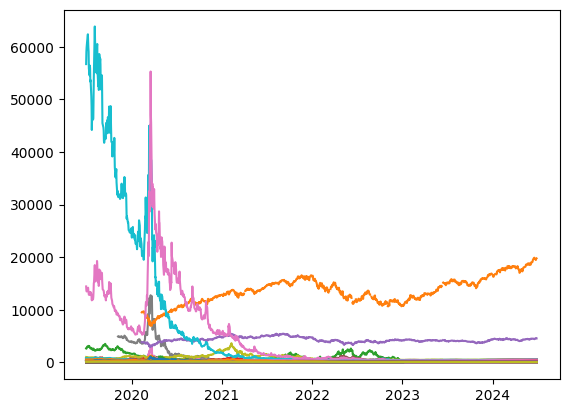

In [21]:
plt.plot(df_histo)
plt.show()

## Data Cleaning

### percent of data present
We first observe the percent prescence of our data (scope decreased to a daily observation versus hourly for better data quality and denoising). 

In [22]:
threshold = 0.999
clean_keys = []
n = len(df_histo)
#for i in df_histo.columns:
clean_pct = df_histo.isnull().sum(axis = 0)/n
clean_names = clean_pct[clean_pct < 1 - threshold].index ## names that are 70% clean 
df_clean = df_histo[clean_names]
df_clean

AAAU         AGG      AGTHX       ACWX  \
2019-07-01 00:00:00-04:00  13.810000  106.422760  45.396320  44.895210   
2019-07-02 00:00:00-04:00  14.120000  106.614197  45.485733  44.942871   
2019-07-03 00:00:00-04:00  14.140000  106.786507  45.771862  45.143040   
2019-07-05 00:00:00-04:00  13.980000  106.336601  45.673512  44.847546   
2019-07-08 00:00:00-04:00  13.900000  106.279182  45.432087  44.552063   
...                              ...         ...        ...        ...   
2024-06-25 00:00:00-04:00  22.950001   97.830002  73.839996  53.290001   
2024-06-26 00:00:00-04:00  22.750000   97.389999  73.949997  52.980000   
2024-06-27 00:00:00-04:00  23.000000   97.550003  74.099998  53.080002   
2024-06-28 00:00:00-04:00  23.010000   97.070000  73.769997  53.130001   
2024-06-29 00:00:00-04:00        NaN         NaN        NaN        NaN   

                               AEPGX      AIMOX       AAXJ        AGQ  \
2019-07-01 00:00:00-04:00  49.696026  14.662516  68.811363  24.070000   
2019-07-02 00:00:00-04:00  49.835800  14.768764  68.840546  24.520000   
2019-07-03 00:00:00-04:00  50.040813  14.768764  68.529266  24.620001   
2019-07-05 00:00:00-04:00  49.789211  14.730128  67.974800  23.650000   
2019-07-08 00:00:00-04:00  49.351234  14.652857  67.245262  23.629999   
...                              ...        ...        ...        ...   
2024-06-25 00:00:00-04:00  57.540001  17.590000  71.959999  36.599998   
2024-06-26 00:00:00-04:00  57.349998  17.459999  71.870003  36.330002   
2024-06-27 00:00:00-04:00  57.320000  17.540001  71.860001  36.689999   
2024-06-28 00:00:00-04:00  57.209999  17.549999  71.980003  37.090000   
2024-06-29 00:00:00-04:00        NaN        NaN        NaN        NaN   

                                 ACWI       AIEQ  ...      YAFFX       YANG  \
2019-07-01 00:00:00-04:00   71.709419  26.305853  ...  15.382379  43.620003   
2019-07-02 00:00:00-04:00   71.883163  26.414919  ...  15.413111  43.878109   
2019-07-03 00:00:00-04:00   72.336838  26.575554  ...  15.459214  44.354614   
2019-07-05 00:00:00-04:00   71.998993  26.623146  ...  15.397745  45.952888   
2019-07-08 00:00:00-04:00   71.622543  26.405005  ...  15.305543  47.005169   
...                               ...        ...  ...        ...        ...   
2024-06-25 00:00:00-04:00  112.589996  35.880001  ...  21.090000   8.220000   
2024-06-26 00:00:00-04:00  112.459999  35.895000  ...  21.040001   8.240000   
2024-06-27 00:00:00-04:00  112.620003  36.189999  ...  21.120001   8.780000   
2024-06-28 00:00:00-04:00  112.400002  36.299999  ...  21.059999   8.730000   
2024-06-29 00:00:00-04:00         NaN        NaN  ...        NaN        NaN   

                                 YCL        YYY        YCS        YINN  \
2019-07-01 00:00:00-04:00  57.419998  14.805871  37.014999  444.572388   
2019-07-02 00:00:00-04:00  57.970001  14.830547  36.785000  442.174683   
2019-07-03 00:00:00-04:00  58.029999  14.871675  36.735001  437.179535   
2019-07-05 00:00:00-04:00  57.340000  14.846997  37.209999  421.594482   
2019-07-08 00:00:00-04:00  56.980000  14.855225  37.445000  411.404327   
...                              ...        ...        ...         ...   
2024-06-25 00:00:00-04:00  20.610001  12.070000  93.540001   23.920000   
2024-06-26 00:00:00-04:00  20.360001  12.060000  94.910004   23.900000   
2024-06-27 00:00:00-04:00  20.400000  11.970000  95.139999   22.230000   
2024-06-28 00:00:00-04:00  20.299999  12.010000  95.110001   22.360001   
2024-06-29 00:00:00-04:00        NaN        NaN        NaN         NaN   

                               YACKX        YXI         ZSL        ZROZ  
2019-07-01 00:00:00-04:00  17.441038  18.433504  156.279999  122.765053  
2019-07-02 00:00:00-04:00  17.482172  18.463362  153.279999  124.029068  
2019-07-03 00:00:00-04:00  17.547987  18.533037  153.000000  125.437843  
2019-07-05 00:00:00-04:00  17.498627  18.672384  158.880005  123.131706  
2019-07-08 00:00:00-04:00  17.424585  18.891354  158.88000

In [23]:
## we want names that still trade
#alive_names
alive_names = (~df_histo.iloc[-2,].isnull())
df_alive = df_histo[alive_names[alive_names==True].index].iloc[:-1,]
df_alive
#df_histo.iloc[-2,].isnull()

AAAU         AGG      AGTHX       ACWX  \
2019-07-01 00:00:00-04:00  13.810000  106.422760  45.396320  44.895210   
2019-07-02 00:00:00-04:00  14.120000  106.614197  45.485733  44.942871   
2019-07-03 00:00:00-04:00  14.140000  106.786507  45.771862  45.143040   
2019-07-05 00:00:00-04:00  13.980000  106.336601  45.673512  44.847546   
2019-07-08 00:00:00-04:00  13.900000  106.279182  45.432087  44.552063   
...                              ...         ...        ...        ...   
2024-06-24 00:00:00-04:00  23.080000   97.839996  73.330002  53.240002   
2024-06-25 00:00:00-04:00  22.950001   97.830002  73.839996  53.290001   
2024-06-26 00:00:00-04:00  22.750000   97.389999  73.949997  52.980000   
2024-06-27 00:00:00-04:00  23.000000   97.550003  74.099998  53.080002   
2024-06-28 00:00:00-04:00  23.010000   97.070000  73.769997  53.130001   

                               AEPGX      AIMOX       AAXJ        AGQ  \
2019-07-01 00:00:00-04:00  49.696026  14.662516  68.811363  24.070000   
2019-07-02 00:00:00-04:00  49.835800  14.768764  68.840546  24.520000   
2019-07-03 00:00:00-04:00  50.040813  14.768764  68.529266  24.620001   
2019-07-05 00:00:00-04:00  49.789211  14.730128  67.974800  23.650000   
2019-07-08 00:00:00-04:00  49.351234  14.652857  67.245262  23.629999   
...                              ...        ...        ...        ...   
2024-06-24 00:00:00-04:00  57.320000  17.420000  72.099998  38.290001   
2024-06-25 00:00:00-04:00  57.540001  17.590000  71.959999  36.599998   
2024-06-26 00:00:00-04:00  57.349998  17.459999  71.870003  36.330002   
2024-06-27 00:00:00-04:00  57.320000  17.540001  71.860001  36.689999   
2024-06-28 00:00:00-04:00  57.209999  17.549999  71.980003  37.090000   

                                 ACWI       AIEQ  ...       YANG        YCL  \
2019-07-01 00:00:00-04:00   71.709419  26.305853  ...  43.620003  57.419998   
2019-07-02 00:00:00-04:00   71.883163  26.414919  ...  43.878109  57.970001   
2019-07-03 00:00:00-04:00   72.336838  26.575554  ...  44.354614  58.029999   
2019-07-05 00:00:00-04:00   71.998993  26.623146  ...  45.952888  57.340000   
2019-07-08 00:00:00-04:00   71.622543  26.405005  ...  47.005169  56.980000   
...                               ...        ...  ...        ...        ...   
2024-06-24 00:00:00-04:00  112.250000  35.865002  ...   8.140000  20.610001   
2024-06-25 00:00:00-04:00  112.589996  35.880001  ...   8.220000  20.610001   
2024-06-26 00:00:00-04:00  112.459999  35.895000  ...   8.240000  20.360001   
2024-06-27 00:00:00-04:00  112.620003  36.189999  ...   8.780000  20.400000   
2024-06-28 00:00:00-04:00  112.400002  36.299999  ...   8.730000  20.299999   

                                 YYY        YCS        YINN      YACKX  \
2019-07-01 00:00:00-04:00  14.805871  37.014999  444.572388  17.441038   
2019-07-02 00:00:00-04:00  14.830547  36.785000  442.174683  17.482172   
2019-07-03 00:00:00-04:00  14.871675  36.735001  437.179535  17.547987   
2019-07-05 00:00:00-04:00  14.846997  37.209999  421.594482  17.498627   
2019-07-08 00:00:00-04:00  14.855225  37.445000  411.404327  17.424585   
...                              ...        ...         ...        ...   
2024-06-24 00:00:00-04:00  12.070000  93.510002   24.540001  24.600000   
2024-06-25 00:00:00-04:00  12.070000  93.540001   23.920000  24.559999   
2024-06-26 00:00:00-04:00  12.060000  94.910004   23.900000  24.459999   
2024-06-27 00:00:00-04:00  11.970000  95.139999   22.230000  24.510000   
2024-06-28 00:00:00-04:00  12.010000  95.110001   22.360001  24.459999   

                                 YXI     ZSB         ZSL        ZROZ  
2019-07-01 00:00:00-04:00  18.433504     NaN  156.279999  122.765053  
2019-07-02 00:00:00-04:00  18.463362     NaN  153.279999  124.029068  
2019-07-03 00:00:00-04:00  18.533037     NaN  153.000000  125.437843  
2019-07-05 00:00:00-04:00  18.672384     NaN  158.880005  123.131706  
2019-07-08 00:00:00-04:00  18.891354     NaN  158.880005  123.575569  
..

we want some interval which has a near 100% presence. Suppose we at least 100 names like this. We can try running this script to find it

In [24]:
# given window length and starting date, we want to find list of names that satisfy this
def findGoodNames(window, start_idx, df_hist)->list:
    snapshot = df_hist.iloc[start_idx:window+start_idx,]
    clean_pct = snapshot.isnull().sum(axis = 0)/len(snapshot)
    clean_names = clean_pct[clean_pct == 0].index ## names that are 100% clean 
    print(clean_names)
    return clean_names

windows = [756, 504, 252, 126]
good_win = 0
for win in windows:
    start_idx = 0
    while(len(findGoodNames(win, start_idx, df_alive))<200 and start_idx + win < len(df_alive)):
        start_idx += 1
    if (start_idx + win < len(df_alive)):
        good_win = win
        break
print("start idx: ", start_idx)
print("window: ", good_win)
        

Index(['AAAU', 'AGG', 'AGTHX', 'ACWX', 'AEPGX', 'AIMOX', 'AAXJ', 'AGQ', 'ACWI',
       'AIEQ',
       ...
       'YAFFX', 'YANG', 'YCL', 'YYY', 'YCS', 'YINN', 'YACKX', 'YXI', 'ZSL',
       'ZROZ'],
      dtype='object', length=811)
start idx:  0
window:  756


In [25]:
len(findGoodNames(win, start_idx, df_alive))

Index(['AAAU', 'AGG', 'AGTHX', 'ACWX', 'AEPGX', 'AIMOX', 'AAXJ', 'AGQ', 'ACWI',
       'AIEQ',
       ...
       'YAFFX', 'YANG', 'YCL', 'YYY', 'YCS', 'YINN', 'YACKX', 'YXI', 'ZSL',
       'ZROZ'],
      dtype='object', length=811)


811

In [37]:
## we define our training set as the largest window of good looking values + that has data that exists today
train_names = findGoodNames(good_win, start_idx, df_alive)
train_set = df_alive[train_names].iloc[start_idx:good_win,]
## process it to observe log return 
train_set = np.log(train_set) - np.log(train_set.shift(1))
train_set= train_set[1:]
train_set

Index(['AAAU', 'AGG', 'AGTHX', 'ACWX', 'AEPGX', 'AIMOX', 'AAXJ', 'AGQ', 'ACWI',
       'AIEQ',
       ...
       'YAFFX', 'YANG', 'YCL', 'YYY', 'YCS', 'YINN', 'YACKX', 'YXI', 'ZSL',
       'ZROZ'],
      dtype='object', length=811)


AAAU       AGG     AGTHX      ACWX     AEPGX  \
2019-07-02 00:00:00-04:00  0.022199  0.001797  0.001968  0.001061  0.002809   
2019-07-03 00:00:00-04:00  0.001415  0.001615  0.006271  0.004444  0.004105   
2019-07-05 00:00:00-04:00 -0.011380 -0.004222 -0.002151 -0.006567 -0.005041   
2019-07-08 00:00:00-04:00 -0.005739 -0.000540 -0.005300 -0.006610 -0.008836   
2019-07-09 00:00:00-04:00  0.002874 -0.000270  0.003144 -0.003429 -0.001512   
...                             ...       ...       ...       ...       ...   
2022-06-23 00:00:00-04:00 -0.006046  0.004158  0.009805 -0.001346 -0.002720   
2022-06-24 00:00:00-04:00 -0.001103 -0.001582  0.032376  0.027023  0.029317   
2022-06-27 00:00:00-04:00 -0.001104 -0.004463 -0.003897 -0.001531  0.000407   
2022-06-28 00:00:00-04:00 -0.001106  0.000398 -0.021805 -0.005927 -0.006939   
2022-06-29 00:00:00-04:00 -0.000553  0.005747 -0.003617 -0.004855 -0.005751   

                              AIMOX      AAXJ       AGQ      ACWI      AIEQ  \
2019-07-02 00:00:00-04:00  0.007220  0.000424  0.018523  0.002420  0.004138   
2019-07-03 00:00:00-04:00  0.000000 -0.004532  0.004070  0.006291  0.006063   
2019-07-05 00:00:00-04:00 -0.002620 -0.008124 -0.040196 -0.004681  0.001789   
2019-07-08 00:00:00-04:00 -0.005260 -0.010790 -0.000846 -0.005242 -0.008227   
2019-07-09 00:00:00-04:00 -0.001980 -0.003478  0.013869 -0.000539  0.002251   
...                             ...       ...       ...       ...       ...   
2022-06-23 00:00:00-04:00 -0.009340  0.007186 -0.043252  0.005747  0.016754   
2022-06-24 00:00:00-04:00  0.029064  0.024111  0.014998  0.029990  0.023978   
2022-06-27 00:00:00-04:00  0.003899 -0.001142 -0.001117 -0.002901 -0.003837   
2022-06-28 00:00:00-04:00 -0.003248 -0.005729 -0.031797 -0.014867 -0.029078   
2022-06-29 00:00:00-04:00 -0.005219 -0.003597 -0.007335 -0.002716 -0.011325   

                           ...     YAFFX      YANG       YCL       YYY  \
2019-07-02 00:00:00-04:00  ...  0.001996  0.005900  0.009533  0.001665   
2019-07-03 00:00:00-04:00  ...  0.002987  0.010801  0.001034  0.002769   
2019-07-05 00:00:00-04:00  ... -0.003984  0.035400 -0.011962 -0.001661   
2019-07-08 00:00:00-04:00  ... -0.006006  0.022641 -0.006298  0.000554   
2019-07-09 00:00:00-04:00  ...  0.000000  0.017792 -0.001757  0.000000   
...                        ...       ...       ...       ...       ...   
2022-06-23 00:00:00-04:00  ... -0.003832 -0.044705  0.018737  0.005602   
2022-06-24 00:00:00-04:00  ...  0.023314 -0.087692 -0.003246  0.015050   
2022-06-27 00:00:00-04:00  ...  0.004812 -0.020166 -0.004444 -0.000786   
2022-06-28 00:00:00-04:00  ... -0.005884 -0.004640 -0.011047 -0.010281   
2022-06-29 00:00:00-04:00  ... -0.008080  0.013857 -0.006324 -0.003185   

                                YCS      YINN     YACKX       YXI       ZSL  \
2019-07-02 00:00:00-04:00 -0.006233 -0.005408  0.002356  0.001618 -0.019383   
2019-07-03 00:00:00-04:00 -0.001360 -0.011361  0.003758  0.003767 -0.001828   
2019-07-05 00:00:00-04:00  0.012848 -0.036300 -0.002817  0.007491  0.037711   
2019-07-08 00:00:00-04:00  0.006296 -0.024467 -0.004240  0.011659  0.000000   
2019-07-09 00:00:00-04:00  0.001468 -0.016157 -0.000472  0.006303 -0.012923   
...                             ...       ...       ...       ...       ...   
2022-06-23 00:00:00-04:00 -0.019650  0.044025 -0.003289 -0.014020  0.040375   
2022-06-24 00:00:00-04:00  0.004067  0.080798  0.024176 -0.029909 -0.013845   
2022-06-27 00:00:00-04:00  0.003171  0.021166  0.003668 -0.006345  0.001020   
2022-06-28 00:00:00-04:00  0.011021  0.003087 -0.006889 -0.001911  0.029783   
2022-06-29 00:00:00-04:00  0.007280 -0.016137 -0.006937  0.007624  0.008536   

                               ZROZ  
2019-07-02 00:00:00-04:00  0.010244  
2019-07-03 00:00:00-04:00  0.011294  
2019-07-05 00:00:00-04:00 -0.018556  
2019-07-08 00:00:00-04:00  0.003598  
2019-07-09 00:00:00-04:00 -0.001250  
...                             ...  
2022-06-23 00:00:00-04:00  0.

# Cointegration

In [38]:
# python 3 program check if a matrix is
# singular or not.
global N
N = 809
 
# Function to get cofactor of mat[p][q] in temp[][].
# n is current dimension of mat[][]
def getCofactor(mat,temp,p,q,n):
    i = 0
    j = 0
     
    # Looping for each element of the matrix
    for row in range(n):
        for col in range(n):
             
            # Copying into temporary matrix only 
            # those element which are not in given 
            # row and column
            if (row != p and col != q):
                temp[i][j] = mat[row][col]
                j += 1
                 
                # Row is filled, so increase row
                # index and reset col index
                if (j == n - 1):
                    j = 0
                    i += 1
 
# Recursive function to check if mat[][] is
# singular or not. */
def isSingular(mat,n):
    D = 0 # Initialize result
     
    # Base case : if matrix contains single element
    if (n == 1):
        return mat[0][0]
         
    temp = [[0 for i in range(N + 1)] for i in range(N + 1)]# To store cofactors
     
    sign = 1 # To store sign multiplier
 
    # Iterate for each element of first row
    for f in range(n):
         
        # Getting Cofactor of mat[0][f]
        getCofactor(mat, temp, 0, f, n)
        D += sign * mat[0][f] * isSingular(temp, n - 1)
         
        # terms are to be added with alternate sign
        sign = -sign
    return D

In [39]:
import seaborn as sns
#sns.heatmap(train_set.corr())
correlated_pairs = []
corr_name_quarantine = []
corr_mat = train_set.corr()
for i in train_set.columns:
    for j in train_set.columns:
        if i == j:
            continue
        if abs(corr_mat.loc[i,j] - 1) < 0.01 or abs(corr_mat.loc[i,j] + 1) < 0.01:
            correlated_pairs.append([i,j])
            corr_name_quarantine.append(j)
print(correlated_pairs)

[['AAAU', 'BAR'], ['AAAU', 'GLD'], ['AAAU', 'GLDM'], ['AAAU', 'IAU'], ['AAAU', 'UGL'], ['ACWX', 'IXUS'], ['ACWX', 'VEU'], ['ACWX', 'VSGX'], ['ACWX', 'VXUS'], ['AGQ', 'SIVR'], ['AGQ', 'SLV'], ['ACWI', 'VT'], ['ASHR', 'CHAU'], ['BAR', 'AAAU'], ['BAR', 'GLD'], ['BAR', 'GLDM'], ['BAR', 'IAU'], ['BBEU', 'IEUR'], ['BBEU', 'VGK'], ['BBJP', 'EWJ'], ['BRMKX', 'IWR'], ['BRMKX', 'VO'], ['BSPAX', 'ESGU'], ['BSPAX', 'ESGV'], ['BSPAX', 'FXAIX'], ['BSPAX', 'GSLC'], ['BSPAX', 'ITOT'], ['BSPAX', 'IWB'], ['BSPAX', 'IVV'], ['BSPAX', 'IWL'], ['BSPAX', 'IYY'], ['BSPAX', 'IWV'], ['BSPAX', 'MGC'], ['BSPAX', 'OEF'], ['BSPAX', 'SCHB'], ['BSPAX', 'SCHX'], ['BSPAX', 'SDS'], ['BSPAX', 'SH'], ['BSPAX', 'SPLG'], ['BSPAX', 'SPTM'], ['BSPAX', 'SPUU'], ['BSPAX', 'SPXL'], ['BSPAX', 'SPXS'], ['BSPAX', 'SPXU'], ['BSPAX', 'SPY'], ['BSPAX', 'SPYX'], ['BSPAX', 'SSO'], ['BSPAX', 'SUSA'], ['BSPAX', 'UPRO'], ['BSPAX', 'VFIAX'], ['BSPAX', 'VOO'], ['BSPAX', 'VONE'], ['BSPAX', 'VTI'], ['BSPAX', 'VV'], ['BTMKX', 'FIONX'], ['CHAU',

In [40]:
print('How many unique correlated pairs we have: ', len(correlated_pairs))
#corr_name_quarantine

How many unique correlated pairs we have:  1404


In [41]:
### we remove the names which are highly correlated (numerically causing singular matrix issues) for a non-corr matrix analysis
unCorr_train = train_set[[x for x in train_set.columns if x not in corr_name_quarantine]]
unCorr_train

AGG     AGTHX     AEPGX     AIMOX      AAXJ  \
2019-07-02 00:00:00-04:00  0.001797  0.001968  0.002809  0.007220  0.000424   
2019-07-03 00:00:00-04:00  0.001615  0.006271  0.004105  0.000000 -0.004532   
2019-07-05 00:00:00-04:00 -0.004222 -0.002151 -0.005041 -0.002620 -0.008124   
2019-07-08 00:00:00-04:00 -0.000540 -0.005300 -0.008836 -0.005260 -0.010790   
2019-07-09 00:00:00-04:00 -0.000270  0.003144 -0.001512 -0.001980 -0.003478   
...                             ...       ...       ...       ...       ...   
2022-06-23 00:00:00-04:00  0.004158  0.009805 -0.002720 -0.009340  0.007186   
2022-06-24 00:00:00-04:00 -0.001582  0.032376  0.029317  0.029064  0.024111   
2022-06-27 00:00:00-04:00 -0.004463 -0.003897  0.000407  0.003899 -0.001142   
2022-06-28 00:00:00-04:00  0.000398 -0.021805 -0.006939 -0.003248 -0.005729   
2022-06-29 00:00:00-04:00  0.005747 -0.003617 -0.005751 -0.005219 -0.003597   

                               AIEQ       AOR     AQMNX     ANGIX       AOA  \
2019-07-02 00:00:00-04:00  0.004138  0.002030  0.012858  0.000000  0.000874   
2019-07-03 00:00:00-04:00  0.006063  0.005219  0.000000  0.000000  0.007253   
2019-07-05 00:00:00-04:00  0.001789 -0.004347 -0.003490  0.000000 -0.004708   
2019-07-08 00:00:00-04:00 -0.008227 -0.002836  0.000000  0.000000 -0.003273   
2019-07-09 00:00:00-04:00  0.002251 -0.001093 -0.001166  0.000000 -0.001276   
...                             ...       ...       ...       ...       ...   
2022-06-23 00:00:00-04:00  0.016754  0.006497 -0.016737  0.001055  0.005033   
2022-06-24 00:00:00-04:00  0.023978  0.015546 -0.005288  0.001054  0.022012   
2022-06-27 00:00:00-04:00 -0.003837 -0.004329  0.003176 -0.001054 -0.002951   
2022-06-28 00:00:00-04:00 -0.029078 -0.008089  0.009469 -0.006349 -0.011559   
2022-06-29 00:00:00-04:00 -0.011325  0.001457 -0.001048 -0.002125 -0.001163   

                           ...      XSOE      XSVM      XSMO        XT  \
2019-07-02 00:00:00-04:00  ... -0.000514 -0.012359 -0.001865  0.003069   
2019-07-03 00:00:00-04:00  ... -0.000961  0.007228  0.007970  0.003314   
2019-07-05 00:00:00-04:00  ... -0.008688  0.006495  0.002907 -0.007152   
2019-07-08 00:00:00-04:00  ... -0.009743 -0.008554 -0.009011 -0.008754   
2019-07-09 00:00:00-04:00  ... -0.002836 -0.002753  0.002128  0.002583   
...                        ...       ...       ...       ...       ...   
2022-06-23 00:00:00-04:00  ...  0.006250 -0.001808 -0.004610  0.014809   
2022-06-24 00:00:00-04:00  ...  0.014092  0.029201  0.029595  0.034991   
2022-06-27 00:00:00-04:00  ... -0.001708  0.006787  0.012483 -0.002602   
2022-06-28 00:00:00-04:00  ... -0.010309 -0.012515 -0.008007 -0.023115   
2022-06-29 00:00:00-04:00  ... -0.005195 -0.014017 -0.014169 -0.008239   

                               XYLD       XAR       YYY       YCS       ZSL  \
2019-07-02 00:00:00-04:00  0.003645  0.007308  0.001665 -0.006233 -0.019383   
2019-07-03 00:00:00-04:00  0.007050  0.001914  0.002769 -0.001360 -0.001828   
2019-07-05 00:00:00-04:00 -0.003217  0.003151 -0.001661  0.012848  0.037711   
2019-07-08 00:00:00-04:00 -0.001209 -0.009964  0.000554  0.006296  0.000000   
2019-07-09 00:00:00-04:00  0.001209  0.004898  0.000000  0.001468 -0.012923   
...                             ...       ...       ...       ...       ...   
2022-06-23 00:00:00-04:00  0.002591 -0.003243  0.005602 -0.019650  0.040375   
2022-06-24 00:00:00-04:00  0.007266  0.031184  0.015050  0.004067 -0.013845   
2022-06-27 00:00:00-04:00  0.001400 -0.001477 -0.000786  0.003171  0.001020   
2022-06-28 00:00:00-04:00 -0.004207 -0.011398 -0.010281  0.011021  0.029783   
2022-06-29 00:00:00-04:00  0.000936 -0.013245 -0.003185  0.007280  0.008536   

                               ZROZ  
2019-07-02 00:00:00-04:00  0.010244  
2019-07-03 00:00:00-04:00  0.011294  
2019-07-05 00:00:00-04:00 -0.018556  
2019-07-08 00:00:00-04:00  0.003598  
2019-07-09 00:00:00-04:00 -0.001250  
...                             ...  
2022-06-23 00:00:00-04:00  0.0

<Axes: >

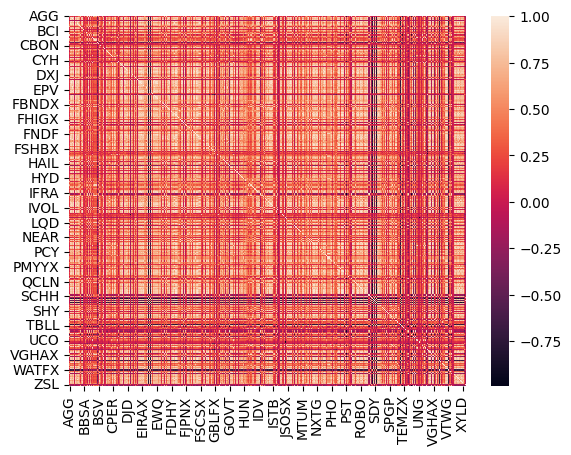

In [42]:
sns.heatmap(unCorr_train.corr())

In [43]:
## we run a variety of different cointegration tests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
# Perform the Johansen Cointegration Test with a specified number of zero
specified_number = 0  # Testing for zero cointegrating relationships
coint_test_result = coint_johansen(unCorr_train.iloc[:,:3], specified_number, 1)

# Extract the trace statistics and eigen statistics
trace_stats = coint_test_result.lr1
eigen_stats = coint_test_result.lr2

# Print the test results
print("Johansen Cointegration Test Results (Testing for Zero Cointegrating Relationships):")
print(f"Trace Statistics: {coint_test_result.lr1}")
print(f"Critical Values: {coint_test_result.cvt}")

# Define stock pairs
stock_pairs = [('AAPL', 'AMZN'), ('MSFT', 'AAPL'), ('AMZN', 'MSFT')]

# Separate the output sections
print("\n" + "-" * 50 + "\n")

# Interpret the results for each pair
for i, (stock1, stock2) in enumerate(stock_pairs):
    trace_statistic = trace_stats[i]
    eigen_statistic = eigen_stats[i]
    print(f"Pair {i + 1} ({stock1} and {stock2}):")
    print(f"Trace Statistic: {trace_statistic}")
    print(f"Eigen Statistic: {eigen_statistic}")
    print("\n" + "-" * 50 + "\n")

# Determine cointegration based on critical values or other criteria
# Add your cointegration assessment logic here
print("Cointegration Assessment: Testing for Zero Cointegrating Relationships (Null Hypothesis)\n")

Johansen Cointegration Test Results (Testing for Zero Cointegrating Relationships):
Trace Statistics: [1031.36141705  607.36237444  243.9007124 ]
Critical Values: [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

--------------------------------------------------

Pair 1 (AAPL and AMZN):
Trace Statistic: 1031.361417052599
Eigen Statistic: 423.99904261678864

--------------------------------------------------

Pair 2 (MSFT and AAPL):
Trace Statistic: 607.3623744358106
Eigen Statistic: 363.46166203991737

--------------------------------------------------

Pair 3 (AMZN and MSFT):
Trace Statistic: 243.90071239589318
Eigen Statistic: 243.90071239589318

--------------------------------------------------

Cointegration Assessment: Testing for Zero Cointegrating Relationships (Null Hypothesis)



In [45]:
## obesrving one example 
x1 = 'AAAU'
x2 = 'BAR'

sub_train = df_alive[train_names].iloc[start_idx:good_win,]
sub_train = sub_train[[x1, x2]]
sub_train

AAAU        BAR
2019-07-01 00:00:00-04:00  13.810000  13.797000
2019-07-02 00:00:00-04:00  14.120000  14.085000
2019-07-03 00:00:00-04:00  14.140000  14.140000
2019-07-05 00:00:00-04:00  13.980000  13.970000
2019-07-08 00:00:00-04:00  13.900000  13.880000
...                              ...        ...
2022-06-23 00:00:00-04:00  18.139999  18.110001
2022-06-24 00:00:00-04:00  18.120001  18.084999
2022-06-27 00:00:00-04:00  18.100000  18.059999
2022-06-28 00:00:00-04:00  18.080000  18.040001
2022-06-29 00:00:00-04:00  18.070000  18.020000

[756 rows x 2 columns]